In [10]:
import FinanceDataReader as fdr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [12]:
# CSV 파일 불러오기
df = pd.read_csv("C:/Users/jinwo/Downloads/AAME.csv")

df = df.dropna()
df = df[df['Open'] != 0]  # 0인 행 제거
df

,Date,Open,High,Low,Close,Adj Close,Volume
66,1980-06-19,3.80,3.80,3.80,3.80,3.171437,0
71,1980-06-26,3.50,3.50,3.50,3.50,2.921061,0
72,1980-06-27,3.50,3.50,3.50,3.50,2.921061,0
118,1980-09-03,4.60,4.60,4.60,4.60,3.839107,0
194,1980-12-22,5.25,5.25,5.25,5.25,4.381591,0
...,...,...,...,...,...,...,...
10093,2020-03-26,2.29,2.29,2.08,2.28,2.280000,1600
10094,2020-03-27,2.25,2.25,2.21,2.25,2.250000,500
10095,2020-03-30,2.25,2.25,2.13,2.13,2.130000,400
10096,2020-03-31,2.11,2.11,2.11,2.11,2.110000,300


In [14]:
from sklearn.preprocessing import MinMaxScaler
# 2. 특징값 정규화
features = ['Open', 'High', 'Low', 'Close']
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[features])

In [16]:
# 3. 시퀀스 데이터 생성 함수
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i])
        y.append(data[i, 3])  # 'Close' 예측
    return np.array(X), np.array(y)

In [18]:
# 4. 시퀀스 생성
sequence_length = 60
X, y = create_sequences(scaled_data, sequence_length)

In [20]:
# 5. 훈련/테스트 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6772, 60, 4), (1694, 60, 4), (6772,), (1694,))

In [22]:
# 6. LSTM 모델 구성
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
model = Sequential()
model.add(LSTM(16, activation='tanh', return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

C:\Users\jinwo\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
# 7. 모델 학습
model.fit(X_train, y_train, epochs=50, batch_size=16)

# 8. 예측
predicted = model.predict(X_test)

Epoch 1/50
424/424 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - loss: 8.3772e-04
Epoch 2/50
424/424 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - loss: 2.0519e-04
Epoch 3/50
424/424 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - loss: 1.5922e-04
Epoch 4/50
424/424 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - loss: 1.5517e-04
Epoch 5/50
424/424 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - loss: 1.2990e-04
Epoch 6/50
424/424 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - loss: 1.3727e-04
Epoch 7/50
424/424 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - loss: 1.2842e-04
Epoch 8/50
424/424 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - loss: 1.2229e-04
Epoch 9/50
424/424 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - loss: 1.3558e-04
Epoch 10/50
424/424 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - loss: 1.2415e-04
Epoch 11/50
424/424 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - loss: 1.3739e-04
Epoch 12/50
424/424 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - loss: 1.3048e-04
Epoch 13/50
424/424 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - loss: 1.0770e-04
Epoch 14/50
424/424 ━━━━━━━━━━━━━━━━━━━━ 10s 23

In [24]:
# 9. 역정규화 (Close만 복원)
#close_index = features.index('Close')
#min_val = scaler.min_[close_index]
#scale_val = scaler.scale_[close_index]
#predicted_prices = predicted * scale_val + min_val
#real_prices = y_test * scale_val + min_val

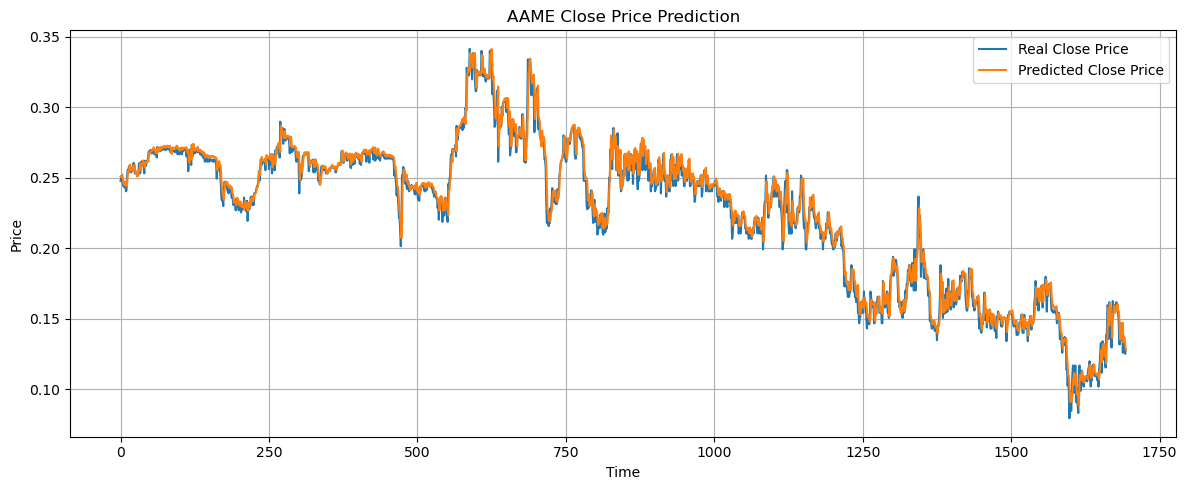

In [33]:
# 10. 결과 시각화
plt.figure(figsize=(12, 5))
plt.plot(y_test, label='Real Close Price')
plt.plot(predicted, label='Predicted Close Price')
plt.title('AAME Close Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()